[![open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nagaoka-ai-innovationhub/basics-of-image-recognition-with-cnn/blob/master/10_how_to_avoid_overfitting.ipynb)

# 過学習対策

機械学習をおこなっていく上で、訓練用データにはうまく適合しているのですが、テスト用データにはうまく適合できないケースは多々出てきます。
例えば以下のMNISTの例では、訓練用データでは約98%の正答率ですが、テスト用データはそれより正答率が落ちてしまいます。

In [1]:
# ColabでのTensorFlow 2.xのインストール
try:
    # %tensorflow_version は Colab 上でのみ使えます
    %tensorflow_version 2.x
except Exception:
    pass

# ライブラリの読み込み
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

# TensorFlowとtf.kerasのバージョン確認
print(tf.version.VERSION)
print(tf.keras.__version__)

2.4.0
2.4.0


In [2]:
# MNISTデータセットの読み込み
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# モデルの構築
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

# モデルのコンパイル
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

# 学習データの前処理
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# モデルの学習
model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

# 学習済モデルの評価
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.4204 - accuracy: 0.8769
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1096 - accuracy: 0.9669
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0693 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0498 - accuracy: 0.9847
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0685 - accuracy: 0.9798
test_acc:  0.9797999858856201


これは、訓練用データに適合しすぎて、未知のデータであるテスト用データを使って推論するとそれよりも落ちてしまう現象です。
このことを「**過学習**」(overfitting)と呼びます。

過学習とは異なり、訓練用データにまだ適合できていないことを「学習不足」(underfitting)と呼びます。これはまだモデルに改善の余地があることを示しています。

ここで、訓練用データの最初の10,000件を検証用データとして学習し、学習の過程をグラフ化してみましょう。

In [3]:
# MNISTデータセットの読み込み
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# モデルの構築
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

# モデルのコンパイル
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

# 学習データの前処理
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
# データを訓練用と検証用に分ける
x_val = train_images[:10000]      # 検証用
x_train = train_images[10000:]   # 訓練用

y_val = train_labels[:10000]     # 検証用
y_train = train_labels[10000:]  # 訓練用

In [5]:
# モデルの学習
history = model.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data=(x_val, y_val))

Epoch 1/20
391/391 [==============================] - 4s 9ms/step - loss: 0.4503 - accuracy: 0.8709 - val_loss: 0.1519 - val_accuracy: 0.9548
Epoch 2/20
391/391 [==============================] - 3s 7ms/step - loss: 0.1234 - accuracy: 0.9631 - val_loss: 0.1118 - val_accuracy: 0.9677
Epoch 3/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0769 - accuracy: 0.9777 - val_loss: 0.0924 - val_accuracy: 0.9730
Epoch 4/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0556 - accuracy: 0.9827 - val_loss: 0.0844 - val_accuracy: 0.9747
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0425 - accuracy: 0.9874 - val_loss: 0.0803 - val_accuracy: 0.9773
Epoch 6/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0286 - accuracy: 0.9922 - val_loss: 0.0805 - val_accuracy: 0.9782
Epoch 7/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0221 - accuracy: 0.9942 - val_loss: 0.0732 - val_accuracy: 0.9791
Epoch 

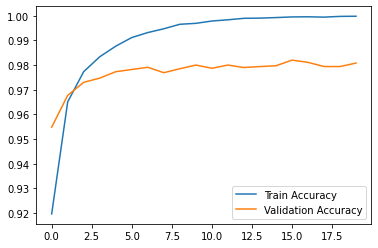

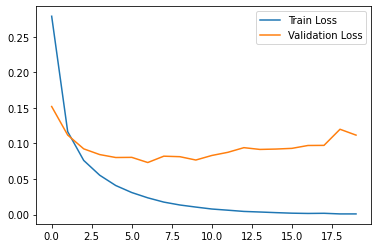

In [6]:
# 学習の推移をグラフ化してみてみよう。
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']  # 学習データの正答率
val_acc = history.history['val_accuracy']  # 検証データの正答率
loss = history.history['loss']  # 学習データの損失
val_loss = history.history['val_loss']  # 検証データの損失

epochs = range(len(acc))

plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.show()

学習を繰り返す毎に、訓練用データには非常によく適合しています。
対して、検証用データには、途中で損失も正答率も改善が見られません。
この例では8エポック以降から損失が増加している傾向が見られます。

機械学習での本来の目的は、訓練用データの適合ではなく、未知のデータ（この場合検証用データ）に対して、うまく予測できることです。
未知のデータにうまく予測できるように、学習モデルをうまく汎化させることが必要になります。

例えば、今回の例では7エポック時点で訓練を止めるというのも、過学習対策の一つの方法です。

最も最善の策は「**学習データを増やす**」ことです。データを学習すればするほど、モデルは自然と汎化していきます。
それができない場合は、いくつか方法があります。

## 1. モデルサイズを小さくする

単純な方法としては、モデルのサイズを小さくすることです。
これはモデルの学習可能なパラメータを減らすことになります。
パラメータは「層の数」と「層1つあたりのユニット（ノード）の数」によって決まります。

パラメータが多いほど、モデルが持つ記憶容量(キャパシティ）が増えて、
訓練用の入力データとそれに対する目的の値とのマッピングをまるで辞書を引くかのように学習できることが直感的にわかるかと思います。
しかし、マッピングの性能は汎化の性能とは関係ありません。

一方で、モデルサイズが小さいと、このマッピングは簡単に学習することはできません。
モデルが持つ記憶容量が少なくなりますので、学習不足に陥る可能性も出てきます。

そのため、「キャパシティが多すぎる」状態と「キャパシティが足りない」状態の妥協点を探る必要がありますが、
適切なキャパシティを簡単に求められる方法がないため、様々な方法を試みてみなければなりません。

一般的なワークフローは、比較的少ない数の層とユニット（ノード）から始めて、検証データでの損失値を見て収穫逓減が見られるまで、層を追加したり層のユニット数を増やしたりしていきます。

ここでは、キャパシティの大小で学習の推移がどれだけ変わるのかを比較してみてみましょう。

In [7]:
# 比較のベースとなるモデルの構築
base_model = models.Sequential()
base_model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
base_model.add(layers.Dense(10, activation='softmax'))

# モデルのコンパイル
base_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

In [8]:
# キャパシティの小さいモデルの構築
low_model = models.Sequential()
low_model.add(layers.Dense(64, activation='relu', input_shape=(28 * 28,)))
low_model.add(layers.Dense(10, activation='softmax'))

# モデルのコンパイル
low_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

In [9]:
# キャパシティの大きいモデルの構築
high_model = models.Sequential()
high_model.add(layers.Dense(1024, activation='relu', input_shape=(28 * 28,)))
high_model.add(layers.Dense(1024, activation='relu', input_shape=(28 * 28,)))
high_model.add(layers.Dense(10, activation='softmax'))

# モデルのコンパイル
high_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

In [10]:
# モデルの学習
base_history = base_model.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data=(x_val, y_val))

Epoch 1/20
391/391 [==============================] - 3s 6ms/step - loss: 0.4742 - accuracy: 0.8612 - val_loss: 0.1552 - val_accuracy: 0.9539
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 0.1241 - accuracy: 0.9641 - val_loss: 0.1051 - val_accuracy: 0.9682
Epoch 3/20
391/391 [==============================] - 3s 6ms/step - loss: 0.0732 - accuracy: 0.9780 - val_loss: 0.0943 - val_accuracy: 0.9714
Epoch 4/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0539 - accuracy: 0.9837 - val_loss: 0.0788 - val_accuracy: 0.9763
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0393 - accuracy: 0.9883 - val_loss: 0.0808 - val_accuracy: 0.9765
Epoch 6/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0283 - accuracy: 0.9917 - val_loss: 0.0785 - val_accuracy: 0.9776
Epoch 7/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0220 - accuracy: 0.9939 - val_loss: 0.0741 - val_accuracy: 0.9792
Epoch 

In [11]:
# キャパシティの小さいモデルの学習
low_history = low_model.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data=(x_val, y_val))

Epoch 1/20
391/391 [==============================] - 1s 3ms/step - loss: 0.6786 - accuracy: 0.8198 - val_loss: 0.2615 - val_accuracy: 0.9252
Epoch 2/20
391/391 [==============================] - 1s 2ms/step - loss: 0.2380 - accuracy: 0.9310 - val_loss: 0.2060 - val_accuracy: 0.9419
Epoch 3/20
391/391 [==============================] - 1s 2ms/step - loss: 0.1794 - accuracy: 0.9503 - val_loss: 0.1657 - val_accuracy: 0.9527
Epoch 4/20
391/391 [==============================] - 1s 2ms/step - loss: 0.1452 - accuracy: 0.9586 - val_loss: 0.1487 - val_accuracy: 0.9557
Epoch 5/20
391/391 [==============================] - 1s 2ms/step - loss: 0.1230 - accuracy: 0.9640 - val_loss: 0.1409 - val_accuracy: 0.9586
Epoch 6/20
391/391 [==============================] - 1s 2ms/step - loss: 0.1081 - accuracy: 0.9697 - val_loss: 0.1291 - val_accuracy: 0.9612
Epoch 7/20
391/391 [==============================] - 1s 2ms/step - loss: 0.0953 - accuracy: 0.9723 - val_loss: 0.1193 - val_accuracy: 0.9644
Epoch 

In [12]:
# キャパシティの大きいモデルの学習
high_history = high_model.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data=(x_val, y_val))

Epoch 1/20
391/391 [==============================] - 13s 32ms/step - loss: 0.4415 - accuracy: 0.8601 - val_loss: 0.1348 - val_accuracy: 0.9604
Epoch 2/20
391/391 [==============================] - 11s 27ms/step - loss: 0.0879 - accuracy: 0.9735 - val_loss: 0.0893 - val_accuracy: 0.9742
Epoch 3/20
391/391 [==============================] - 11s 27ms/step - loss: 0.0543 - accuracy: 0.9832 - val_loss: 0.0890 - val_accuracy: 0.9749
Epoch 4/20
391/391 [==============================] - 11s 29ms/step - loss: 0.0371 - accuracy: 0.9888 - val_loss: 0.0871 - val_accuracy: 0.9803
Epoch 5/20
391/391 [==============================] - 11s 29ms/step - loss: 0.0272 - accuracy: 0.9921 - val_loss: 0.1160 - val_accuracy: 0.9761
Epoch 6/20
391/391 [==============================] - 17s 42ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.1114 - val_accuracy: 0.9795
Epoch 7/20
391/391 [==============================] - 13s 32ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.1357 - val_accuracy:

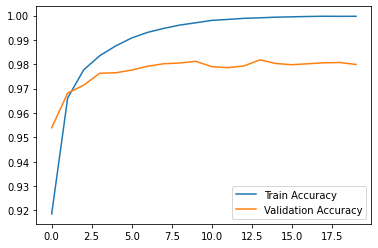

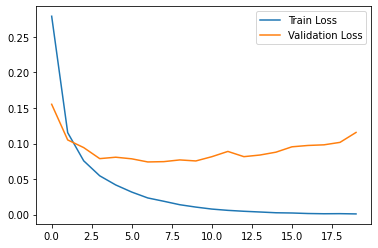

In [13]:
# ベースモデルの学習の推移をグラフ化
import matplotlib.pyplot as plt
%matplotlib inline

acc = base_history.history['accuracy']  # 学習データの正答率
val_acc = base_history.history['val_accuracy']  # 検証データの正答率
loss = base_history.history['loss']  # 学習データの損失
val_loss = base_history.history['val_loss']  # 検証データの損失

epochs = range(len(acc))

plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.show()

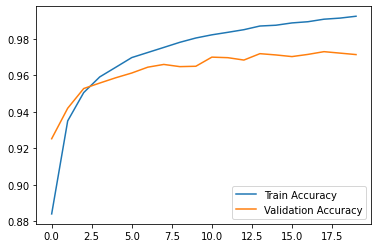

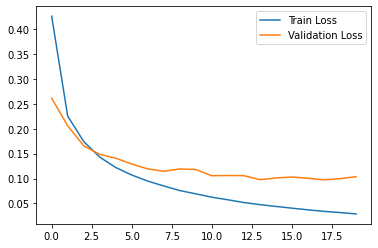

In [14]:
# キャパシティの小さいモデルの学習の推移をグラフ化
import matplotlib.pyplot as plt
%matplotlib inline

acc = low_history.history['accuracy']  # 学習データの正答率
val_acc = low_history.history['val_accuracy']  # 検証データの正答率
loss = low_history.history['loss']  # 学習データの損失
val_loss = low_history.history['val_loss']  # 検証データの損失

epochs = range(len(acc))

plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.show()

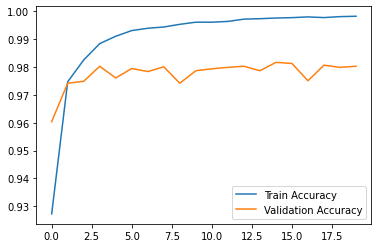

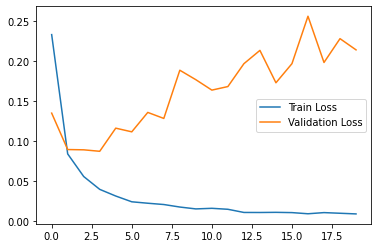

In [15]:
# キャパシティの大きいモデルの学習の推移をグラフ化
import matplotlib.pyplot as plt
%matplotlib inline

acc = high_history.history['accuracy']  # 学習データの正答率
val_acc = high_history.history['val_accuracy']  # 検証データの正答率
loss = high_history.history['loss']  # 学習データの損失
val_loss = high_history.history['val_loss']  # 検証データの損失

epochs = range(len(acc))

plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.show()

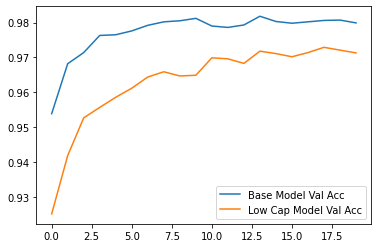

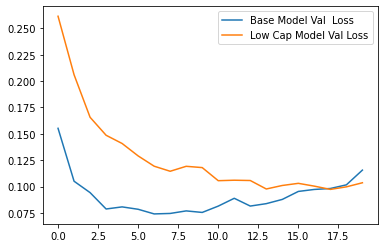

In [16]:
# ベースモデルと小さいモデルの検証データでの学習推移を比較
import matplotlib.pyplot as plt
%matplotlib inline

base_val_acc = base_history.history['val_accuracy']  # 検証データの正答率
base_val_loss = base_history.history['val_loss']  # 検証データの損失
low_val_acc = low_history.history['val_accuracy']  # 検証データの正答率
low_val_loss = low_history.history['val_loss']  # 検証データの損失

epochs = range(len(acc))

plt.plot(epochs, base_val_acc, label='Base Model Val Acc')
plt.plot(epochs, low_val_acc, label='Low Cap Model Val Acc')
plt.legend()
plt.show()

plt.plot(epochs, base_val_loss, label='Base Model Val  Loss')
plt.plot(epochs, low_val_loss, label='Low Cap Model Val Loss')
plt.legend()
plt.show()

ベースモデルとキャバシティの小さいモデルの学習推移を比較ましょう。
ベースモデルでは、損失が7エポックくらいから徐々に大きくなっています。
一方、キャパシティの小さいモデルでは、全体的に損失が大きいですが、15エポックくらいから損失がベースモデルより小さくなっています。

基本的に、キャパシティの小さいモデルは性能低下が遅くなる傾向があります。
今回のキャパシティの小さいモデルは、まだ学習の余地がありそうです。

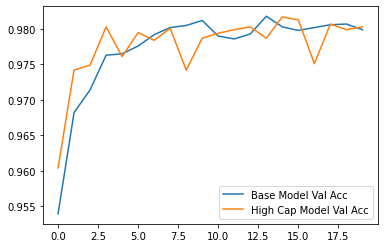

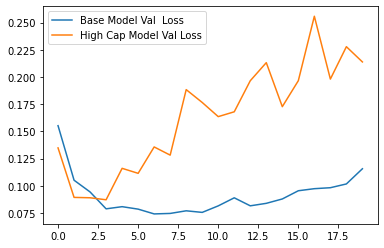

In [17]:
# ベースモデルと大きいモデルの検証データでの学習推移を比較
import matplotlib.pyplot as plt
%matplotlib inline

base_val_acc = base_history.history['val_accuracy']  # 検証データの正答率
base_val_loss = base_history.history['val_loss']  # 検証データの損失
high_val_acc = high_history.history['val_accuracy']  # 検証データの正答率
high_val_loss = high_history.history['val_loss']  # 検証データの損失

epochs = range(len(acc))

plt.plot(epochs, base_val_acc, label='Base Model Val Acc')
plt.plot(epochs, high_val_acc, label='High Cap Model Val Acc')
plt.legend()
plt.show()

plt.plot(epochs, base_val_loss, label='Base Model Val  Loss')
plt.plot(epochs, high_val_loss, label='High Cap Model Val Loss')
plt.legend()
plt.show()

ベースモデルとキャバシティの大きいモデルの学習推移を比較ましょう。
ベースモデルでは、損失が7エポックくらいから徐々に大きくなっています。
一方、キャパシティの大きいモデルでは、3エポック以降から損失がベースモデルより大きくなっています。 
また、損失の振れ幅が大きくノイズがある状態です。

基本的に、キャパシティの大きいモデルはすぐにモデル化されますが、過学習に陥りやすくなります。
今回のキャパシティの大きいモデルは、ベースモデルよりも深刻な過学習になっていることがわかります。

もう一度改めて述べますが、一般的なワークフローは、比較的少ない数の層とユニット（ノード）から始めて、検証データでの損失値を見て収穫逓減が見られるまで、層を追加したり層のユニット数を増やしたりしていきます。問題を解くのに適切なサイズはどれなのか、繰り返し学習をしてキャパシティサイズを決めていきましょう。

## 2. 重みを正則化する

正則化 (regularization) は、モデルの複雑さに歯止めをかけて過学習を防ぐための手法です。
正則化は、[オッカムの剃刀](https://ja.wikipedia.org/wiki/%E3%82%AA%E3%83%83%E3%82%AB%E3%83%A0%E3%81%AE%E5%89%83%E5%88%80) (Occam's razor) という原則で言われている「必要以上に多くを仮定すべきではない」を実現するものです。
単純なモデルの方が、より複雑なモデルよりも過学習に陥りにくい可能性があります。

単純なモデルとは、パラメータの数が少ないモデルのことを意味します。
ここでは、モデルのネットワークの重みに小さい値だけが設定されるようにすることで、ネットワークの複雑さに歯止めをかけることができます。
重みの値をそのように制限すると、重みの値の分布がより正則化されます。

重みを正則化するには、大きな重みを使用する場合の**コスト**を追加します。
コストには2種類存在します。

- L1正則化
    - 追加されるコストは重みの絶対値 (重みのL1ノルム) に比例
    - 大きな値となるような重みを削減する際に使われる
- L2正則化
    - 追加されるコストは重みの値の二乗 (重みのL2ノルム) に比例
    - 大きな値となるような重みを小さくして、大きな値にならないようにする

`tf.keras`では、以下のように指定できます。

In [18]:
# モデルにL2正則化を追加
from tensorflow.keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28 * 28,)))
l2_model.add(layers.Dense(10, activation='softmax'))

`l2(0.001)`は、その層の重みごとに、ネットワークの全損失に `0.001* weight_coefficient_value` を足すことを意味します。
(`weight_coefficient_value`: 重み係数値)

ベースモデルと比較してみましょう。

In [19]:
# モデルのコンパイル
l2_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

# モデルの学習
l2_history = l2_model.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data=(x_val, y_val))

Epoch 1/20
391/391 [==============================] - 4s 8ms/step - loss: 0.7774 - accuracy: 0.8665 - val_loss: 0.3016 - val_accuracy: 0.9525
Epoch 2/20
391/391 [==============================] - 3s 7ms/step - loss: 0.2803 - accuracy: 0.9528 - val_loss: 0.2240 - val_accuracy: 0.9601
Epoch 3/20
391/391 [==============================] - 3s 7ms/step - loss: 0.2123 - accuracy: 0.9626 - val_loss: 0.2020 - val_accuracy: 0.9628
Epoch 4/20
391/391 [==============================] - 3s 7ms/step - loss: 0.1818 - accuracy: 0.9683 - val_loss: 0.1822 - val_accuracy: 0.9677
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 0.1686 - accuracy: 0.9712 - val_loss: 0.1884 - val_accuracy: 0.9661
Epoch 6/20
391/391 [==============================] - 3s 9ms/step - loss: 0.1579 - accuracy: 0.9733 - val_loss: 0.1640 - val_accuracy: 0.9726
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 0.1548 - accuracy: 0.9744 - val_loss: 0.1807 - val_accuracy: 0.9654
Epoch

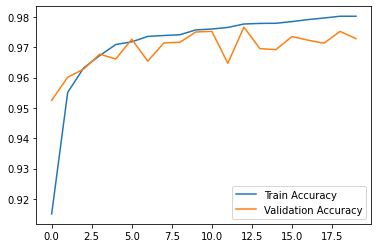

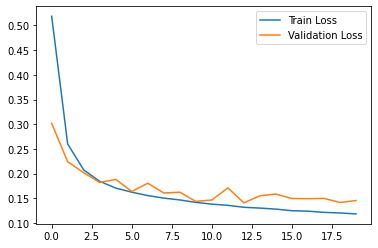

In [20]:
# L2正則化モデルの学習の推移をグラフ化
import matplotlib.pyplot as plt
%matplotlib inline

acc = l2_history.history['accuracy']  # 学習データの正答率
val_acc = l2_history.history['val_accuracy']  # 検証データの正答率
loss = l2_history.history['loss']  # 学習データの損失
val_loss = l2_history.history['val_loss']  # 検証データの損失

epochs = range(len(acc))

plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.show()

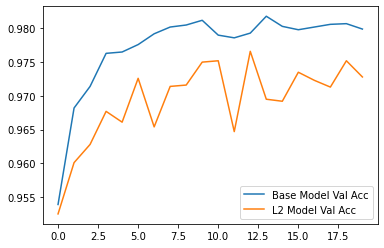

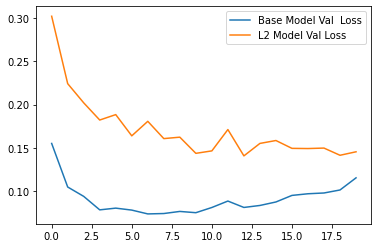

In [21]:
# ベースモデルとL2正則化モデルの検証データでの学習推移を比較
import matplotlib.pyplot as plt
%matplotlib inline

base_val_acc = base_history.history['val_accuracy']  # 検証データの正答率
base_val_loss = base_history.history['val_loss']  # 検証データの損失
l2_val_acc = l2_history.history['val_accuracy']  # 検証データの正答率
l2_val_loss = l2_history.history['val_loss']  # 検証データの損失

epochs = range(len(acc))

plt.plot(epochs, base_val_acc, label='Base Model Val Acc')
plt.plot(epochs, l2_val_acc, label='L2 Model Val Acc')
plt.legend()
plt.show()

plt.plot(epochs, base_val_loss, label='Base Model Val  Loss')
plt.plot(epochs, l2_val_loss, label='L2 Model Val Loss')
plt.legend()
plt.show()

今回のL2正則化モデルは学習の推移を見る限り、エポック数をさらに増やすと損失が減って良いモデルに近づくかもしれません。
また、過学習が抑えられていることがわかると思います。

正則化は以下の方法で指定することができます。

In [22]:
from tensorflow.keras import regularizers

# L1正則化
regularizers.l1(0.001)

# L2正則化
regularizers.l2(0.001)

# L1正則化とL2正則化の同時適用
regularizers.l1_l2(l1=0.001, l2=0.001)

## 3. Dropout を追加する

ドロップアウト (Dropout) はニューラルネットワークでよく用いられる正則化手法の一つです。
ドロップアウトは、訓練中の層の出力の一部をランダムに取り除きます。すなわち、出力の一部をランダムに0にします。

例えば、`[0.2, 0.5, 0.1, 1.1, 0.4]` のようなベクトルがある場合、ドロップアウトを実施すると `[0, 0.5, 0.1, 0, 0.4]`のように一部をランダムに0にします。
ランダムに0にする割合を**ドロップアウト率**と呼ばれ、通常は0.2から0.5に設定します。

`tf.keras`では、`Dropout`層を追加することで適用できます。

In [23]:
# モデルにドロップアウトを追加
dropout_model = models.Sequential()
dropout_model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(10, activation='softmax'))

In [24]:
# モデルのコンパイル
dropout_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

# モデルの学習
dropout_history = dropout_model.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data=(x_val, y_val))

Epoch 1/20
391/391 [==============================] - 4s 9ms/step - loss: 0.5404 - accuracy: 0.8399 - val_loss: 0.1631 - val_accuracy: 0.9535
Epoch 2/20
391/391 [==============================] - 3s 9ms/step - loss: 0.1778 - accuracy: 0.9472 - val_loss: 0.1154 - val_accuracy: 0.9662
Epoch 3/20
391/391 [==============================] - 4s 9ms/step - loss: 0.1283 - accuracy: 0.9609 - val_loss: 0.1006 - val_accuracy: 0.9701
Epoch 4/20
391/391 [==============================] - 3s 8ms/step - loss: 0.1049 - accuracy: 0.9681 - val_loss: 0.0918 - val_accuracy: 0.9727
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0907 - accuracy: 0.9727 - val_loss: 0.0849 - val_accuracy: 0.9762
Epoch 6/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0793 - accuracy: 0.9759 - val_loss: 0.0805 - val_accuracy: 0.9771
Epoch 7/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0758 - accuracy: 0.9777 - val_loss: 0.0790 - val_accuracy: 0.9781
Epoch 

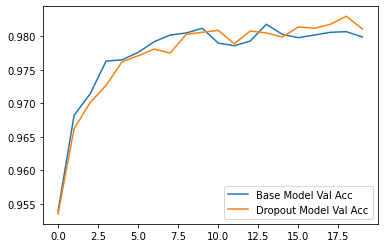

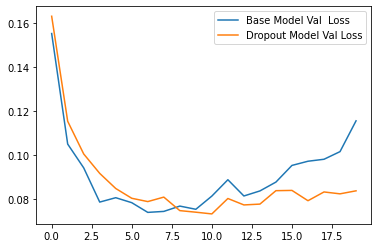

In [25]:
# ベースモデルとDropout追加モデルの検証データでの学習推移を比較
import matplotlib.pyplot as plt
%matplotlib inline

base_val_acc = base_history.history['val_accuracy']  # 検証データの正答率
base_val_loss = base_history.history['val_loss']  # 検証データの損失
dropout_val_acc = dropout_history.history['val_accuracy']  # 検証データの正答率
dropout_val_loss = dropout_history.history['val_loss']  # 検証データの損失

epochs = range(len(acc))

plt.plot(epochs, base_val_acc, label='Base Model Val Acc')
plt.plot(epochs, dropout_val_acc, label='Dropout Model Val Acc')
plt.legend()
plt.show()

plt.plot(epochs, base_val_loss, label='Base Model Val  Loss')
plt.plot(epochs, dropout_val_loss, label='Dropout Model Val Loss')
plt.legend()
plt.show()

ドロップアウトを追加すると、ベースモデルより損失の増加が抑えられており、過学習に効果があることが伺えます。

## 4. Batch Normalization を追加する

バッチ正規化 (Batch Normalization / Batch Norm) は、元々学習プロセスを安定化させて学習速度を向上させるための手法ですが、正則化効果があるため過学習を抑える働きがあります。

今までの演習で、入力画像の値を[0, 255]から[0, 1]の範囲にして学習が早く終わる(収束する)ようにしていました。データの範囲が大きいと、収束するまで時間がかかるからです。バッチ正規化では、ネットワークの途中でバッチ毎の各入力チャネルデータを平均0, 分散1に変換し、適切な範囲にスケール&シフトをすることで、学習を安定させています。

なお、学習時はバッチ毎の平均と分散を利用して標準化しますが、推論時はそれらの移動平均・移動分散を利用します。

入力データ: $\boldsymbol{x} = \{x_1, x_2, ..., x_n\}$ ($n$: データ件数 = バッチサイズ)  
学習で得られるパラメータ: $\gamma, \beta$ (標準化後に適切な範囲にスケール&シフトする際に使用)  
ゼロ除算を防ぐための極小値 (例: $10^{-8}$ や $0.001$): $\epsilon$  
出力データ: $\boldsymbol{y} = \{y_1, y_2, ..., y_n\}$

$$
\mu = \frac{1}{n}\sum^{n}_{i=1}x_i
$$

$$
\sigma^2 = \frac{1}{n}\sum^{n}_{i=1}(x_i-\mu)^2
$$

$$
\hat{x_i} = \frac{x_i-\mu}{\sqrt{\sigma^2 + \epsilon}}
$$

$$
y_i = \gamma \hat{x_i} + \beta
$$

`tf.keras`では、`BatchNormalization`層を追加することで適用できます。

In [26]:
# モデルにBatch Normalizationを追加
batchnorm_model = models.Sequential()
batchnorm_model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
batchnorm_model.add(layers.BatchNormalization())
batchnorm_model.add(layers.Dense(10, activation='softmax'))

なお、[原論文](https://arxiv.org/abs/1502.03167)では、`BatchNormalization`は活性化関数(`ReLU`など)の前に置いてます。
その場合は以下のように適用します。

In [27]:
# Batch NormalizationをActivationの前に追加
batchnorm_orig_model = models.Sequential()
batchnorm_orig_model.add(layers.Dense(512, input_shape=(28 * 28,)))
batchnorm_orig_model.add(layers.BatchNormalization())
batchnorm_orig_model.add(layers.Activation('relu'))
batchnorm_orig_model.add(layers.Dense(10, activation='softmax'))

In [28]:
# モデルのコンパイル
batchnorm_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

# モデルの学習
batchnorm_history = batchnorm_model.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data=(x_val, y_val))

Epoch 1/20
391/391 [==============================] - 4s 9ms/step - loss: 0.3202 - accuracy: 0.9068 - val_loss: 0.1335 - val_accuracy: 0.9615
Epoch 2/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0717 - accuracy: 0.9791 - val_loss: 0.0871 - val_accuracy: 0.9730
Epoch 3/20
391/391 [==============================] - 4s 9ms/step - loss: 0.0406 - accuracy: 0.9877 - val_loss: 0.0862 - val_accuracy: 0.9740
Epoch 4/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0263 - accuracy: 0.9925 - val_loss: 0.0798 - val_accuracy: 0.9779
Epoch 5/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0192 - accuracy: 0.9943 - val_loss: 0.0742 - val_accuracy: 0.9784
Epoch 6/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0137 - accuracy: 0.9958 - val_loss: 0.0746 - val_accuracy: 0.9788
Epoch 7/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0107 - accuracy: 0.9972 - val_loss: 0.0721 - val_accuracy: 0.9802
Epoch 

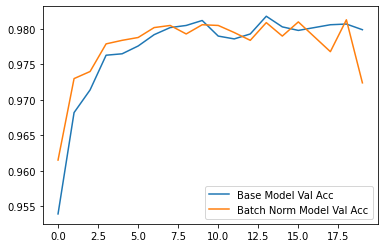

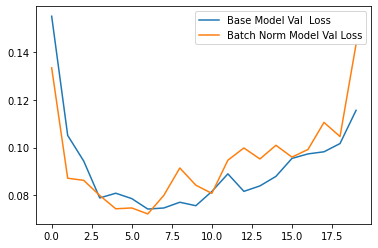

In [29]:
# ベースモデルとBatch Normalization追加モデルの検証データでの学習推移を比較
import matplotlib.pyplot as plt
%matplotlib inline

base_val_acc = base_history.history['val_accuracy']  # 検証データの正答率
base_val_loss = base_history.history['val_loss']  # 検証データの損失
batchnorm_val_acc = batchnorm_history.history['val_accuracy']  # 検証データの正答率
batchnorm_val_loss = batchnorm_history.history['val_loss']  # 検証データの損失

epochs = range(len(acc))

plt.plot(epochs, base_val_acc, label='Base Model Val Acc')
plt.plot(epochs, batchnorm_val_acc, label='Batch Norm Model Val Acc')
plt.legend()
plt.show()

plt.plot(epochs, base_val_loss, label='Base Model Val  Loss')
plt.plot(epochs, batchnorm_val_loss, label='Batch Norm Model Val Loss')
plt.legend()
plt.show()

ちなみに、Batch NormalizationとDropoutを併用する際は注意が必要です。Batch Normalizationの前にDropoutをするとパフォーマンスが悪化します。併用する際は、Dropoutを出力層直前の1層のみに適用する等して、Batch Normalizationの前にDropoutをしないようにしましょう。

参考: [Batch Normalization と Dropout は併用しない方が良いという話 | 10001 ideas](https://10001ideas.com/2018/10/10/batch-normalization-%E3%81%A8-dropout-%E3%81%AF%E4%BD%B5%E7%94%A8%E3%81%97%E3%81%AA%E3%81%84%E6%96%B9%E3%81%8C%E8%89%AF%E3%81%84%E3%81%A8%E3%81%84%E3%81%86%E8%A9%B1/)

In [30]:
# Batch NormalizationとDropoutの併用例
batchnorm_dropout_model = models.Sequential()
batchnorm_dropout_model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
batchnorm_dropout_model.add(layers.BatchNormalization())
batchnorm_dropout_model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
batchnorm_dropout_model.add(layers.Dropout(0.5))
batchnorm_dropout_model.add(layers.Dense(10, activation='softmax'))

## 過学習対策のまとめ

過学習の対策は以下の通りです。

- 学習データを増やす
- モデルサイズを小さくする
- 重みを正則化する
- Dropoutを追加する
- Batch Normalizationを追加する

なお、学習データを増やせない場合、代替案としてデータ拡張を使う方法があります。
データ拡張については、[05_input_and_display_images.ipynb](./05_input_and_display_images.ipynb) をご確認ください。
ただし、元の学習データ数があまりにも少ないとデータ拡張の効果があまり出ませんので、過信は禁物です。